## Reviews and Ratings

In [ ]:
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd
import time
import urllib
from bs4 import BeautifulSoup
import pandas as pd
import re

In [ ]:
browser.get("https://www.imdb.com/title/tt15438246/reviews?ref_=tt_urv")

In [ ]:
for i in range(5):
  browser.find_element(By.ID, "load-more-trigger").click()
  time.sleep(3)

In [ ]:
def _click_(p):
  try:
    p.click()
  except:
    pass

In [ ]:
spoilers = browser.find_elements(By.XPATH, "//div[@class='expander-icon-wrapper spoiler-warning__control']")
normals = browser.find_elements(By.XPATH, "//div[@class='expander-icon-wrapper show-more__control']")

In [ ]:
x = [_click_(x) for x in spoilers]
y = [_click_(x) for x in normals]

In [ ]:
containers = browser.find_elements(By.XPATH, "//div[@class='review-container']")

In [ ]:
len(containers)

150

In [ ]:
containers[0]

<div class="review-container" style="max-height: none;">
        <div class="lister-item-content">
    <div class="ipl-ratings-bar">
            <span class="rating-other-user-rating">
            <svg class="ipl-icon ipl-star-icon  " xmlns="http://www.w3.org/2000/svg" fill="#000000" height="24" viewBox="0 0 24 24" width="24">
                <path d="M0 0h24v24H0z" fill="none"></path>
                <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
                <path d="M0 0h24v24H0z" fill="none"></path>
            </svg>
                <span>7</span><span class="point-scale">/10</span>
            </span>
    </div>
<a href="/review/rw8774379/?ref_=tt_urv" class="title"> It's like a free toy in a cereal box.
</a>            <div class="display-name-date">
                    <span class="display-name-link"><a href="/user/ur64798417/?ref_=tt_urv">Top_Dawg_Critic</a></span><span class="review-date">2 January 2023</span>
   

### REVIEWS

In [ ]:
list1 =[]
for i in range(0,len(containers)):
    bsObj = BeautifulSoup(containers[i].get_attribute('innerHTML')).find('div', attrs = {'class':'text show-more__control'}).text
    list1.append(bsObj)

In [ ]:
list1[0]

"It's a gimmick to get you to buy the cereal, but once you get to the toy at the bottom of the box, it's just a cheap useless piece of plastic, and not worth buying the cereal you normally wouldn't buy, just for the toy. This is the case here, a gimmick that does work, but not worth the eight colorful episodes that are basically a two-hour movie spread thinly to make a series, and really not offering up anything revolutionary that hasn't been done before, and much better. If you enjoy this genre and haven't seen Money Heist yet, watch that instead of this, it's 1000x better.But if you are still curious about this series, then I suggest to watch this in the following order: yellow, violet, orange, green, blue, red, pink. If you leave out white, your imagination would probably be a better resolution. If you're binging like I did, wait a week to enjoy your imagination's of heist day, then watch white to compare your ending to the finale... you'll get the most enjoyment this way. The other

In [ ]:
len(list1)

150

### RATINGS

In [ ]:
list2 =[]
for i in range(0,len(containers)):
    bsObj = BeautifulSoup(containers[i].get_attribute('innerHTML')).find('span',attrs = {'class':'rating-other-user-rating'}).text.strip()
    bsObj2 = re.findall("[0-9.]+(?=/)", bsObj)[0]
    list2.append(bsObj2)

In [ ]:
list2[0]

'7'

In [ ]:
len(list2)

150

### DataFrame

In [ ]:
data = pd.DataFrame(zip(list1, list2), columns=['Review', 'Rating'], index = range(1,151))

In [ ]:
data.head()

,Review,Rating
1,"It's a gimmick to get you to buy the cereal, b...",7
2,I was really looking forward to watching this ...,5
3,I don't mind the nonlinear approach. The story...,4
4,"So, there was a lot of potential in the script...",4
5,The gimmick of being able to watch the show in...,5


In [ ]:
data["Rating"].value_counts()

5     26
8     23
7     19
6     18
1     18
3     15
4     13
9      7
10     6
2      5
Name: Rating, dtype: int64

In [ ]:
data['Rating'] = data['Rating'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  150 non-null    object
 1   Rating  150 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.9+ KB


## WORDCLOUD

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
wc = WordCloud(max_words = 200, regexp = "[A-z]+", width = 800, height = 400, stopwords = STOPWORDS, random_state = 40)

In [ ]:
only_reviews = ' '.join(data['Review'])

In [ ]:
len(only_reviews)

136667

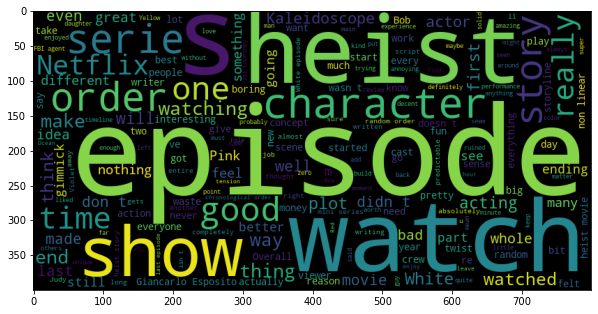

In [ ]:
# Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews))
plt.show()

In [ ]:
only_reviews_positive = ' '.join(data[data['Rating']>=6]['Review'])
only_reviews_negative = ' '.join(data[data['Rating']<=5]['Review'])

### Positive Reviews

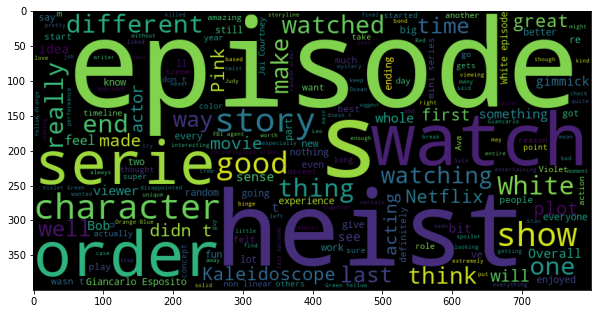

In [ ]:
# Positive Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews_positive))
plt.show()

In [ ]:
positive_reviews_tokens = re.findall("[A-z']+", only_reviews_positive)

In [ ]:
positive = ' '.join(positive_reviews_tokens)

In [ ]:
len(positive)

70421

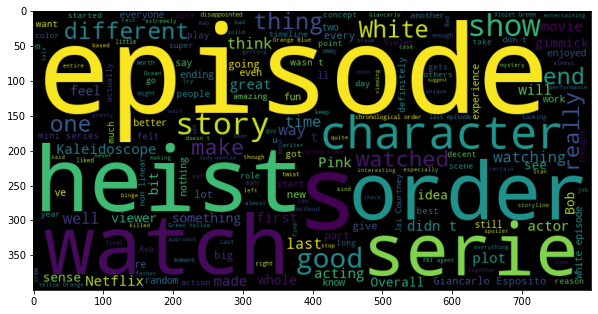

In [ ]:
# Positive Review Tokens WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(positive))
plt.show()

In [ ]:
# Removing Stopwords from Positve Reviews

positive_reviews_tokens_no_stopwords = [x for x in positive_reviews_tokens if x not in STOPWORDS]

In [ ]:
positive_w_o_stopwords = ' '.join(positive_reviews_tokens_no_stopwords)

In [ ]:
len(positive_w_o_stopwords)

46554

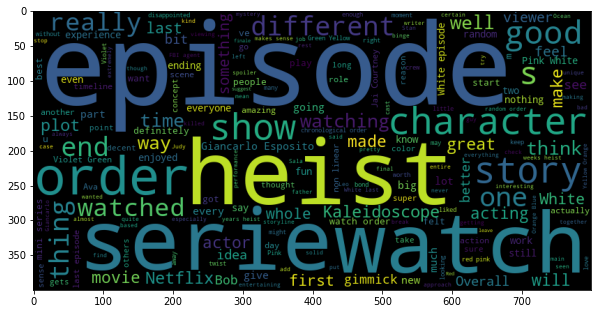

In [ ]:
# Positive Reviews w/o Stopwords WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(positive_w_o_stopwords))
plt.show()

In [ ]:
from collections import Counter

In [ ]:
C = Counter(positive_reviews_tokens_no_stopwords)

In [ ]:
top_200_words_positive = {k:v for k,v in C.most_common(200)}

In [ ]:
len(top_200_words_positive)

200

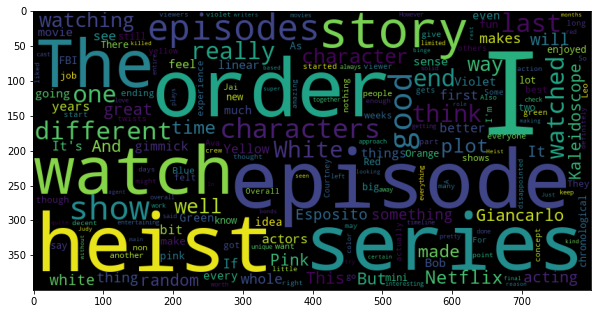

In [ ]:
# Top 200 Positive Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(top_200_words_positive))
plt.show()

### Negative Reviews

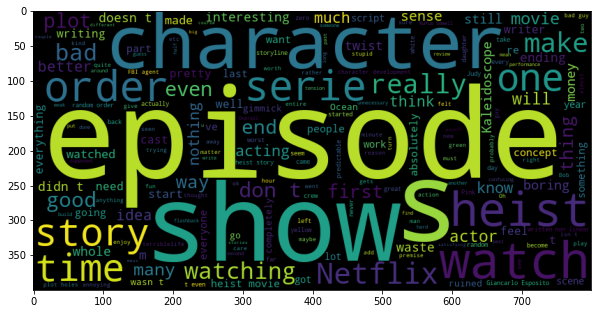

In [ ]:
# Negative Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(only_reviews_negative))
plt.show()

In [ ]:
negative_reviews_tokens = re.findall("[A-z]+", only_reviews_negative)

In [ ]:
negative = ' '.join(negative_reviews_tokens)

In [ ]:
len(negative)

62519

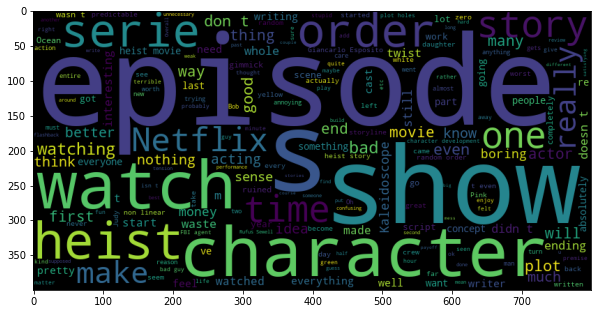

In [ ]:
# Negative Review Tokens WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(negative))
plt.show()

In [ ]:
# Removing Stopwords from Negative Reviews

negative_reviews_tokens_no_stopwords = [x for x in negative_reviews_tokens if x not in STOPWORDS]

In [ ]:
negative_w_o_stopwords = ' '.join(negative_reviews_tokens_no_stopwords)

In [ ]:
len(negative_w_o_stopwords)

41707

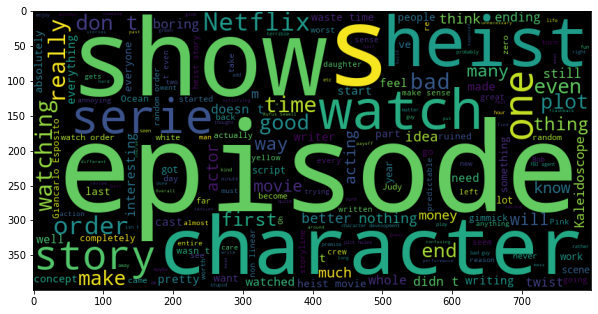

In [ ]:
# Negative Reviews w/o Stopwords WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_text(negative_w_o_stopwords))
plt.show()

In [ ]:
C1 = Counter(negative_reviews_tokens_no_stopwords)

In [ ]:
top_200_words_negative = {k:v for k,v in C1.most_common(200)}

In [ ]:
len(top_200_words_negative)

200

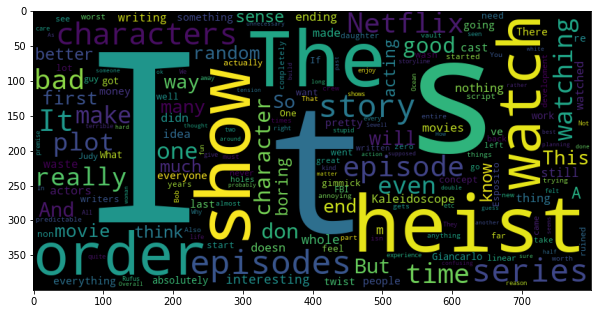

In [ ]:
# Top 200 Negative Reviews WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(top_200_words_negative))
plt.show()

### Exclusive Positve Words

In [ ]:
exclusive_positive_words = set(top_200_words_positive.keys()) - set(top_200_words_negative.keys())

In [ ]:
len(exclusive_positive_words)

82

In [ ]:
exclusive_positive_words_dictionary = {}
for key in top_200_words_positive.keys():
    if key in exclusive_positive_words:
        exclusive_positive_words_dictionary[key] = top_200_words_positive[key]

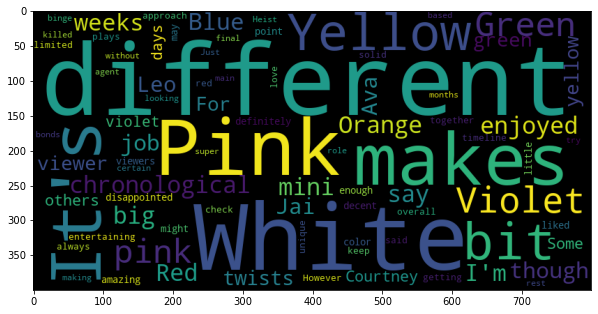

In [ ]:
# Exclusive Positive Words WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(exclusive_positive_words_dictionary))
plt.show()

### Exclusive Negative Words

In [ ]:
exclusive_negative_words = set(top_200_words_negative.keys()) - set(top_200_words_positive.keys())

In [ ]:
len(exclusive_negative_words)

82

In [ ]:
exclusive_negative_words_dictionary = {}
for key in top_200_words_negative.keys():
    if key in exclusive_negative_words:
        exclusive_negative_words_dictionary[key] = top_200_words_negative[key]

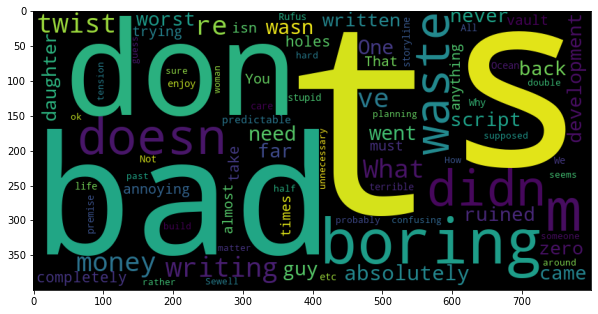

In [ ]:
# Exclusive Negative Words WordCloud

plt.figure(figsize = (10,6))
plt.imshow(wc.generate_from_frequencies(exclusive_negative_words_dictionary))
plt.show()